<a href="https://colab.research.google.com/github/salamoonder/Shop_Beeline/blob/master/Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import HTML



df = pd.read_excel('dataset.xlsx')

In [3]:
df.head()

,year,gdp,edu,health,prom,resource,science,gov,humancap,agricult,socialgrowth,humanres,econgrowth
0,1990,-9.2,0.1,1.3,3.4,2.0,1.1,1.0,2.45,3.2,6.7,15.3,1.4
1,1991,-8.2,0.1,1.4,3.5,2.2,1.3,1.0,2.30,5.4,3.0,12.4,1.3
2,1992,-8.5,0.3,1.5,1.2,1.2,4.4,1.0,2.30,5.2,3.4,11.4,1.3
3,1993,-9.2,0.3,1.6,2.1,1.4,1.2,1.0,2.10,5.6,5.6,9.7,1.4
4,1994,-9.2,0.1,1.5,2.6,3.1,2.1,1.0,2.50,7.4,4.5,9.5,1.4


In [4]:
df.drop('year',axis=1).describe()

,gdp,edu,health,prom,resource,science,gov,humancap,agricult,socialgrowth,humanres,econgrowth
count,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000
mean,7.030000,3.666667,5.573333,14.786667,10.61000,8.423667,11.074000,3.387000,18.80000,25.445000,41.518667,10.040333
std,19.621841,3.387740,3.907282,11.037639,11.37715,10.126420,14.129774,1.728214,12.90461,20.453237,30.618263,11.002751
min,-33.800000,0.100000,1.100000,1.200000,1.20000,1.100000,0.300000,1.200000,2.00000,3.000000,4.600000,1.000000
25%,-8.425000,0.625000,1.675000,7.150000,3.50000,2.750000,1.100000,2.412500,5.45000,7.000000,11.650000,2.650000
50%,7.350000,3.250000,5.700000,10.400000,5.80000,5.000000,3.000000,3.000000,23.45000,23.800000,35.700000,5.200000
75%,23.450000,5.025000,8.425000,22.425000,11.27500,9.000000,17.525000,3.575000,30.37500,36.250000,66.975000,11.825000
max,41.800000,12.500000,13.200000,35.100000,41.50000,45.200000,45.700000,9.300000,37.10000,64.700000,88.600000,36.400000


In [5]:
X_data = df.drop('econgrowth',axis=1)
y_data = df['econgrowth']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

In [6]:
regressor = LinearRegression()  
regressor.fit(X_train.drop('year',axis=1), y_train)
coeff_df = pd.DataFrame(regressor.coef_, X_data.drop('year',axis=1).columns, columns=['Coefficient'])  
coeff_df

,Coefficient
gdp,0.376693
edu,-1.232572
health,1.923752
prom,-0.027400
resource,0.611574
science,1.091863
gov,-1.081324
humancap,-2.813800
agricult,-0.630000
socialgrowth,-0.090177


In [7]:
y_pred = regressor.predict(X_test.drop('year',axis=1))
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
HTML(df_pred.to_html(index=False))

Actual,Predicted
1.30,4.496265
10.40,25.332934
8.00,8.270756
3.40,1.786411
4.21,7.793257
4.70,-8.169547


In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 6.077724481682158
Mean Squared Error: 69.05842572211465
Root Mean Squared Error: 8.310139933967095


Text(0, 0.5, 'econgrowth')

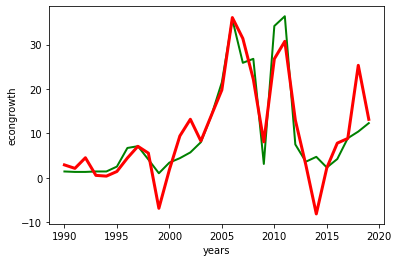

In [9]:
plt.plot(X_data['year'], y_data,  color='green', linewidth=2)
plt.plot(X_data['year'], regressor.predict(X_data.drop('year',axis=1)), color='red',linewidth=3)
plt.xlabel('years')
plt.ylabel('econgrowth')

In [10]:
regressor.predict(df[len(df)-2:len(df)-1].drop(['year','econgrowth'],axis = 1))


array([25.33293377])

In [11]:
!pip install pytelegrambotapi


     |████████████████████████████████| 71kB 2.1MB/s 
  Created wheel for pytelegrambotapi: filename=pyTelegramBotAPI-3.7.1-cp36-none-any.whl size=50883 sha256=2f244d1ab89751b957336c6b00b37252516fb3d309942ec241f698a15336dc7c
  Stored in directory: /root/.cache/pip/wheels/cd/b2/2c/eac6af3343b21f907123ce013d20ad5ad70c2c3731072d98bf
Successfully built pytelegrambotapi


In [12]:
df.head(1)

,year,gdp,edu,health,prom,resource,science,gov,humancap,agricult,socialgrowth,humanres,econgrowth
0,1990,-9.2,0.1,1.3,3.4,2.0,1.1,1.0,2.45,3.2,6.7,15.3,1.4


In [ ]:
import telebot

#1225576524:AAFCfYOq5JXjB6J5RnsH4MdES7R6xpx74_o
bot = telebot.TeleBot('1225576524:AAFCfYOq5JXjB6J5RnsH4MdES7R6xpx74_o')

data = [None for i in range(12)]

@bot.message_handler(commands=['start'])
def start_message(message):
    bot.send_message(message.chat.id, 'Regression modeling bot start with /test')

@bot.message_handler(content_types=['text'])
def start(message):
    if message.text == '/test':
        bot.send_message(message.from_user.id, "Give me data \
        gdp,edu,health,prom,resource,science,gov,humancap,agricult,socialgrowth,humanres,humanres");
        bot.register_next_step_handler(message, get_data); #следующий шаг – функция get_name
    else:
        bot.send_message(message.from_user.id, 'Напиши /test');


def get_data(message):
  global data
  data =  message.text
  try:
    data = data.split()
    data = [float(i) for i in data]
    predicted_growth = regressor.predict([data])[0]
    response = f'predicted economic growth {predicted_growth}'
    bot.send_message(message.from_user.id, response);
  except:
    bot.send_message(message.from_user.id, 'Data format error');


bot.polling()
